## Description
Where else but Quora can a physicist help a chef with a math problem and get cooking tips in return? Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.

Currently, Quora uses a Random Forest model to identify duplicate questions. In this competition, Kagglers are challenged to tackle this natural language processing problem by applying advanced techniques to classify whether question pairs are duplicates or not. Doing so will make it easier to find high quality answers to questions resulting in an improved experience for Quora writers, seekers, and readers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(363861, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
132790,132790,212557,212558,What is the scope after B.Pharm completion?,What am I supposed to do after completing a Ph...,0
353555,353555,482634,482635,What are the best Radiohead B Side songs?,What are the best Radiohead songs?,0
326764,326764,266879,34591,Do women think about sex?,What do women think of sex?,0
138548,138548,220581,59325,I smoked meth and 96 hours later was given a u...,How long does meth stay detectable in the body...,0
160547,160547,250353,250354,How did Kakashi get the Sharingan?,"What is better, Rinnegan or Sharingan?",0
110121,110121,6422,29371,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1
355671,355671,241170,484914,How do I generate all possible substrings of a...,What are the approaches suitable to generate a...,1
259747,259747,375563,375564,Is it possible to turn Rs5000 into 10000 in on...,How can one earn 500 rupee everyday in stock m...,0
268489,268489,373330,189128,When will we know who is elected President?,When will we know the election results?,1
343050,343050,63676,75337,Is Hillary Clinton crazy enough to start a nuc...,Is there a high risk that President Hillary Cl...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363861 entries, 0 to 363860
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            363861 non-null  int64 
 1   qid1          363861 non-null  int64 
 2   qid2          363861 non-null  int64 
 3   question1     363860 non-null  object
 4   question2     363859 non-null  object
 5   is_duplicate  363861 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.7+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
0    228686
1    135175
Name: count, dtype: int64
is_duplicate
0    62.849825
1    37.150175
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

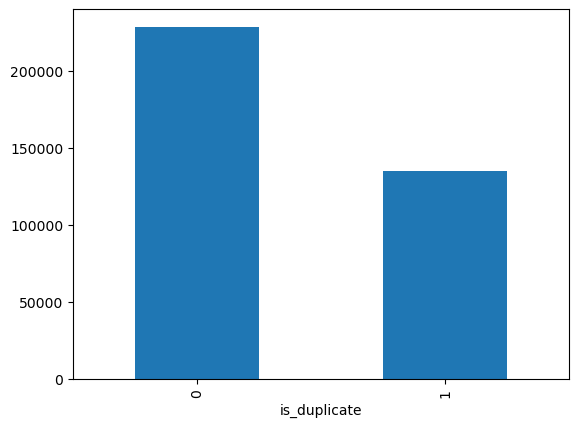

In [16]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 493889
Number of questions getting repeated 98895


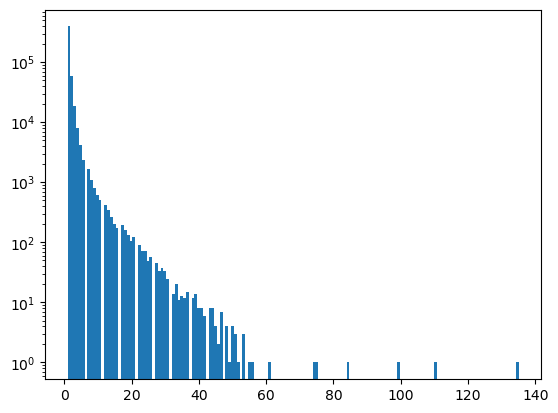

In [18]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()